
## <font color=red>Importar as bibliotecas
***

In [22]:
pip install -U imbalanced-learn



  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 325.1 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/235.6 kB 901.1 kB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\Machine\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import numpy as np
import pandas as pd

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Suavizar os outliers
from scipy.stats.mstats import winsorize  

# Equilibrar conjuntos de dados
from imblearn.over_sampling import SMOTE
from collections import Counter

## <font color=red>Leitura da base de dados
***

In [5]:
%time
df = pd.read_csv('credit_data.csv' , encoding='utf-8')
df.head()

CPU times: total: 0 ns
Wall time: 0 ns


,Unnamed: 0,income,age,loan,default
0,0,66155.925095,59.017015,8106.532131,0
1,1,34415.153966,48.117153,6564.745018,0
2,2,57317.170063,63.108049,8020.953296,0
3,3,42709.534201,45.751972,6103.642260,0
4,4,66952.688845,18.584336,8770.099235,1


## <font color=red>Deletar a coluna Unnamed: 0.
***
> É uma copia do indice da tabela

In [6]:
df.drop(columns= 'Unnamed: 0', axis=0, inplace=True)
df.head()

,income,age,loan,default
0,66155.925095,59.017015,8106.532131,0
1,34415.153966,48.117153,6564.745018,0
2,57317.170063,63.108049,8020.953296,0
3,42709.534201,45.751972,6103.642260,0
4,66952.688845,18.584336,8770.099235,1


## <font color=red>Eliminar valores duplicados
***

In [7]:
df =df.drop_duplicates()

## <font color=red>Informações gerais do dataframe
***
- temos linhas sem registros, 3 na coluna idade
- registros são do tipo numerico

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   income   2000 non-null   float64
 1   age      1997 non-null   float64
 2   loan     2000 non-null   float64
 3   default  2000 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 62.6 KB


In [9]:
# Somar os valores nulos
df.isnull().sum()

income     0
age        3
loan       0
default    0
dtype: int64

## <font color=red>Quantidade de registros por coluna
***

In [10]:
df.default.value_counts()

default
0    1717
1     283
Name: count, dtype: int64

Diferença de dados na variável resposta, é muito grande

## <font color=red>Visualizar dados estatísticos
***

### 1° Visualização

- Visualizar os empréstimo que foram ou não, pagos!!

,income,age,loan
count,2000.000000,1997.000000,2000.000000
mean,45331.600018,40.807559,4444.369695
std,14326.327119,13.624469,3045.410024
min,20014.489470,-52.423280,1.377630
25%,32796.459717,28.990415,1939.708847
50%,45789.117313,41.317159,3974.719419
75%,57791.281668,52.587040,6432.410625
max,69995.685578,63.971796,13766.051239


Text(0, 0.5, 'Empréstimo')

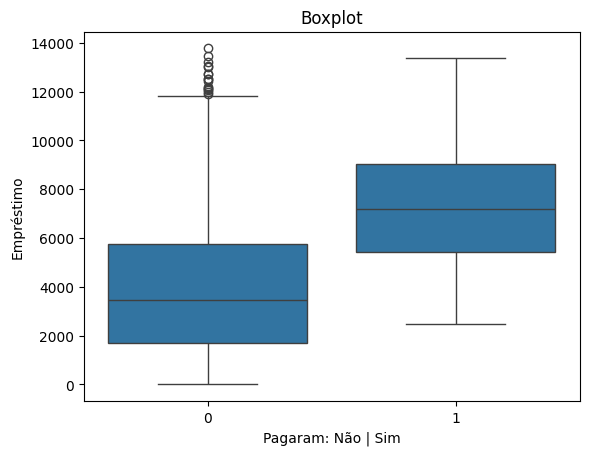

In [11]:
display(df[['income','age','loan']].describe())
sns.boxplot(x='default', y='loan', data=df)
plt.title('Boxplot')
plt.xlabel('Pagaram: Não | Sim')
plt.ylabel('Empréstimo')

 #### Substituição dos valores extremos(Outliers) 
 ***
-  Substituir pelos valores no limite superior e inferior do conjunto de dados. Isso permite suavizar os efeitos dos outliers sem removê-los completamente.

In [12]:
df['suavizar_loan'] = winsorize(df['loan'], limits=[0.05, 0.05])
df.head()

,income,age,loan,default,suavizar_loan
0,66155.925095,59.017015,8106.532131,0,8106.532131
1,34415.153966,48.117153,6564.745018,0,6564.745018
2,57317.170063,63.108049,8020.953296,0,8020.953296
3,42709.534201,45.751972,6103.642260,0,6103.642260
4,66952.688845,18.584336,8770.099235,1,8770.099235


**Repetir o boxplot**

Text(0, 0.5, 'Empréstimo')

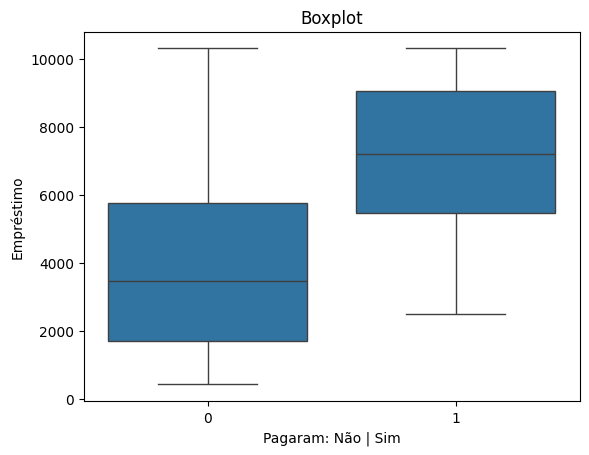

In [13]:
sns.boxplot(x='default', y='suavizar_loan', data=df)
plt.title('Boxplot')
plt.xlabel('Pagaram: Não | Sim')
plt.ylabel('Empréstimo')

### 2° Visualização

- Visualizar os bons e maus pagadores e, suas respectivas idades.

,income,age,loan
count,2000.000000,1997.000000,2000.000000
mean,45331.600018,40.807559,4444.369695
std,14326.327119,13.624469,3045.410024
min,20014.489470,-52.423280,1.377630
25%,32796.459717,28.990415,1939.708847
50%,45789.117313,41.317159,3974.719419
75%,57791.281668,52.587040,6432.410625
max,69995.685578,63.971796,13766.051239


Text(0, 0.5, 'Idade')

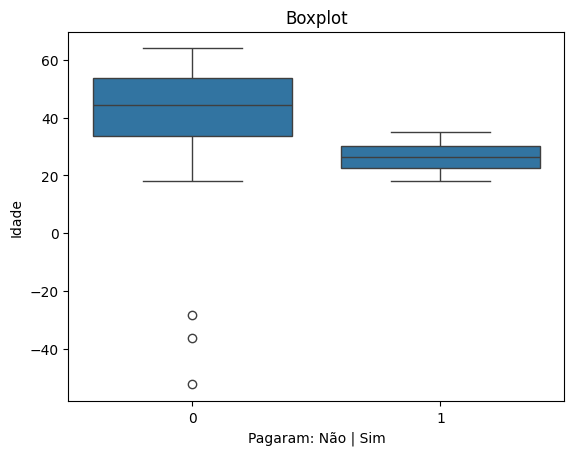

In [14]:
display(df[['income','age','loan']].describe())
sns.boxplot(x='default', y='age', data=df)
plt.title('Boxplot')
plt.xlabel('Pagaram: Não | Sim')
plt.ylabel('Idade')

Realizar um filtro 
- Visualizar os valores negativos

In [15]:
df.query('age <= 0')

,income,age,loan,default,suavizar_loan
15,50501.726689,-28.218361,3977.287432,0,3977.287432
21,32197.620701,-52.423280,4244.057136,0,4244.057136
26,63287.038908,-36.496976,9595.286289,0,9595.286289


**Tratar os valores negativos, relacionados a idade**

In [16]:
media_idade = df[df['age'] >= 0]['age'].mean()
df['age'] = df['age'].apply(lambda x: x if x >= 0 else media_idade)

,income,age,loan
count,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927700,4444.369695
std,14326.327119,13.251870,3045.410024
min,20014.489470,18.055189,1.377630
25%,32796.459717,29.102161,1939.708847
50%,45789.117313,41.300710,3974.719419
75%,57791.281668,52.582340,6432.410625
max,69995.685578,63.971796,13766.051239


Text(0, 0.5, 'Idade')

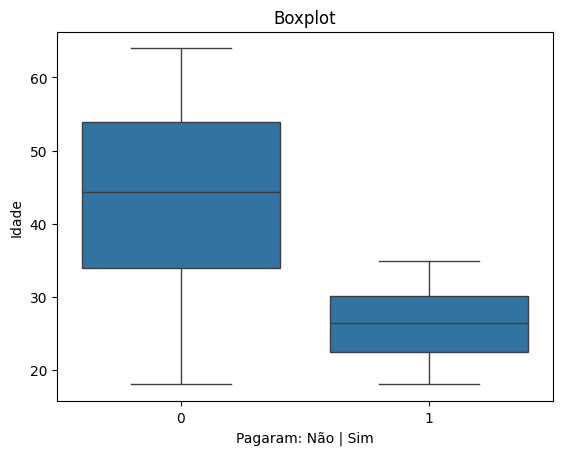

In [17]:
display(df[['income','age','loan']].describe())
sns.boxplot(x='default', y='age', data=df)
plt.title('Boxplot')
plt.xlabel('Pagaram: Não | Sim')
plt.ylabel('Idade')

### 3° Visualização

- Visualizar a Renda

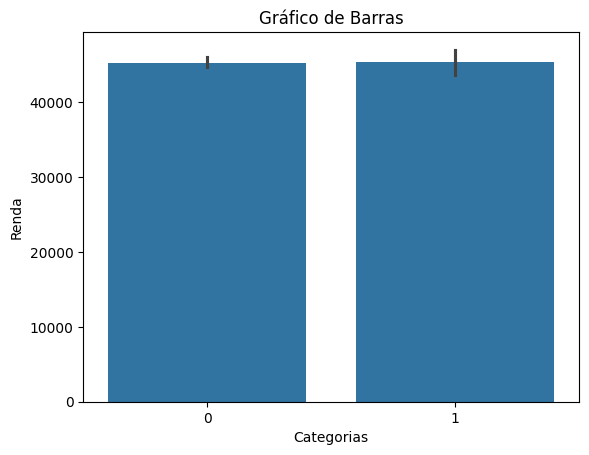

In [18]:
default = df.default
income = df.income

sns.barplot(x=default, y=income)
plt.title('Gráfico de Barras')
plt.xlabel('Categorias')
plt.ylabel('Renda')
plt.show()

### 4° Visualização

- Relação entre duas variáveis ou conjuntos de dados

Text(0.5, 1.0, 'Relação entre as variáveis')

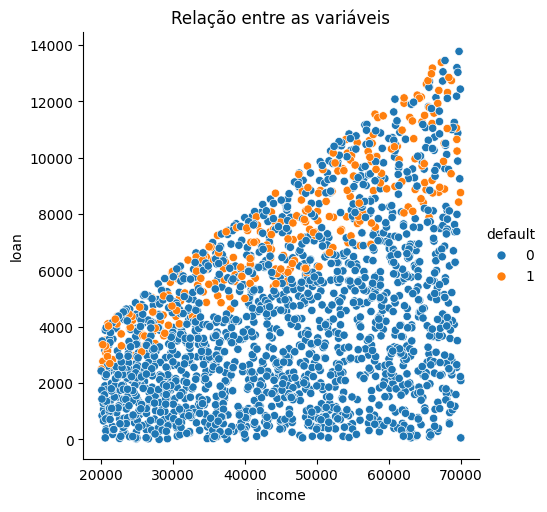

In [19]:
sns.relplot(data=df, x="income", y="loan", hue="default")
plt.title('Relação entre as variáveis')

**Conclusão:** Quanto maior a renda, maior o empréstimo

### **Conclusão:**
- Entre 35 a +60 anos, estão concentrados a maior quantidade de clientes, que não pagam seus empréstimo. Os valores desses empréstimos são: entre 1900 a 6 mil

- Abaixo dos 35 anos, estão os melhores pagadores de empréstimos. Esses clientes pegaram empréstimo com valores: entre 6 e 10 mil

## <font color=red>Oversampling com SMOTE
***

- O SMOTE (Synthetic Minority Over-sampling Technique) é uma técnica que cria exemplos sintéticos da classe minoritária para equilibrar as classes.

In [20]:
df.columns

Index(['income', 'age', 'loan', 'default', 'suavizar_loan'], dtype='object')

In [24]:
X = df[['income', 'age', 'loan']]
y = df['default']

# Use SMOTE para oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Classes antes do SMOTE:", Counter(y))
print("Classes após o SMOTE:", Counter(y_resampled))

Classes antes do SMOTE: Counter({0: 1717, 1: 283})
Classes após o SMOTE: Counter({0: 1717, 1: 1717})


## <font color=red>Train Test Split
***



In [ ]:
features = df[['income', 'age', 'loan']]
label = df['default']

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3,
                                                    random_state=123)